In [48]:
import requests
import json
import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium

from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.ensemble import RandomForestRegressor

In [49]:
url = 'http://localhost:9090/currentpollutionchronic'
response = requests.get(url)
data = response.json()

df = json_normalize(data)
df.head(5)

,Local Government Area Code,Local Government Area Name,Chronic Obstructive Pulmonary Disease RRMSE,Persons with Mental and Behavioural Problems Rate per 100,Asthma RRMSE,Males with Mental and Behavioural Problems Rate per 100,Chronic Obstructive Pulmonary Disease Count,Hypertension Count,Hypertension RRMSE,Respiratory System Diseases Count,...,Males with Mental and Behavioural Problems RRMSE,Chronic Obstructive Pulmonary Disease Rate per 100,High Cholesterol RRMSE,Site Name,Parameters,Time,Local Government Area Shape.type,Local Government Area Shape.coordinates,relation_type.name,relation_type.parent
0,24900,moira,3,14.124853,3,11.989043,746.928469,3532.220757,3,8520.394817,...,3,2.218092,3,Yarrawonga,"[{'name': 'Particles', 'timeSeriesReadings': [...",2024-05-17T03:00:00Z,Polygon,"[[[146.21053866500006, -36.11527584499994], [1...",epa,7
1,26260,southern grampians,1,13.209631,3,11.293796,384.044127,1960.486051,3,5110.028063,...,3,2.020863,3,Hamilton,"[{'name': 'Particles', 'timeSeriesReadings': [...",2024-05-17T03:00:00Z,Polygon,"[[[142.36825914100007, -37.537848841999974], [...",epa,13
2,26260,southern grampians,1,13.209631,3,11.293796,384.044127,1960.486051,3,5110.028063,...,3,2.020863,3,Hamilton,"[{'name': 'Particles', 'timeSeriesReadings': [...",2024-05-17T03:00:00Z,Polygon,"[[[142.36825914100007, -37.537848841999974], [...",epa,13
3,23190,horsham,3,12.721789,3,11.570864,455.077486,2206.457495,3,6010.251990,...,3,2.148330,3,Horsham,"[{'name': 'Particles', 'timeSeriesReadings': [...",2024-05-17T03:00:00Z,Polygon,"[[[141.90024892200006, -37.134857923], [141.89...",epa,26
4,20570,ballarat,3,14.741662,3,12.516261,2101.595620,9510.684386,3,33557.834578,...,3,2.191521,3,Ballarat,"[{'name': 'Particles', 'timeSeriesReadings': [...",2024-05-17T03:00:00Z,Polygon,"[[[143.84322375600004, -37.67026968299998], [1...",epa,41


In [50]:
def parse_parameters(params):
    if isinstance(params, list) and len(params) > 0:
        return [(p['name'], p['timeSeriesReadings']) for p in params]
    return []

df['parsed_parameters'] = df['Parameters'].apply(parse_parameters)
df.head(5)


,Local Government Area Code,Local Government Area Name,Chronic Obstructive Pulmonary Disease RRMSE,Persons with Mental and Behavioural Problems Rate per 100,Asthma RRMSE,Males with Mental and Behavioural Problems Rate per 100,Chronic Obstructive Pulmonary Disease Count,Hypertension Count,Hypertension RRMSE,Respiratory System Diseases Count,...,Chronic Obstructive Pulmonary Disease Rate per 100,High Cholesterol RRMSE,Site Name,Parameters,Time,Local Government Area Shape.type,Local Government Area Shape.coordinates,relation_type.name,relation_type.parent,parsed_parameters
0,24900,moira,3,14.124853,3,11.989043,746.928469,3532.220757,3,8520.394817,...,2.218092,3,Yarrawonga,"[{'name': 'Particles', 'timeSeriesReadings': [...",2024-05-17T03:00:00Z,Polygon,"[[[146.21053866500006, -36.11527584499994], [1...",epa,7,"[(Particles, [{'timeSeriesName': '1HR_AV', 're..."
1,26260,southern grampians,1,13.209631,3,11.293796,384.044127,1960.486051,3,5110.028063,...,2.020863,3,Hamilton,"[{'name': 'Particles', 'timeSeriesReadings': [...",2024-05-17T03:00:00Z,Polygon,"[[[142.36825914100007, -37.537848841999974], [...",epa,13,"[(Particles, [{'timeSeriesName': '1HR_AV', 're..."
2,26260,southern grampians,1,13.209631,3,11.293796,384.044127,1960.486051,3,5110.028063,...,2.020863,3,Hamilton,"[{'name': 'Particles', 'timeSeriesReadings': [...",2024-05-17T03:00:00Z,Polygon,"[[[142.36825914100007, -37.537848841999974], [...",epa,13,"[(Particles, [{'timeSeriesName': '1HR_AV', 're..."
3,23190,horsham,3,12.721789,3,11.570864,455.077486,2206.457495,3,6010.251990,...,2.148330,3,Horsham,"[{'name': 'Particles', 'timeSeriesReadings': [...",2024-05-17T03:00:00Z,Polygon,"[[[141.90024892200006, -37.134857923], [141.89...",epa,26,"[(Particles, [{'timeSeriesName': '1HR_AV', 're..."
4,20570,ballarat,3,14.741662,3,12.516261,2101.595620,9510.684386,3,33557.834578,...,2.191521,3,Ballarat,"[{'name': 'Particles', 'timeSeriesReadings': [...",2024-05-17T03:00:00Z,Polygon,"[[[143.84322375600004, -37.67026968299998], [1...",epa,41,"[(Particles, [{'timeSeriesName': '1HR_AV', 're..."


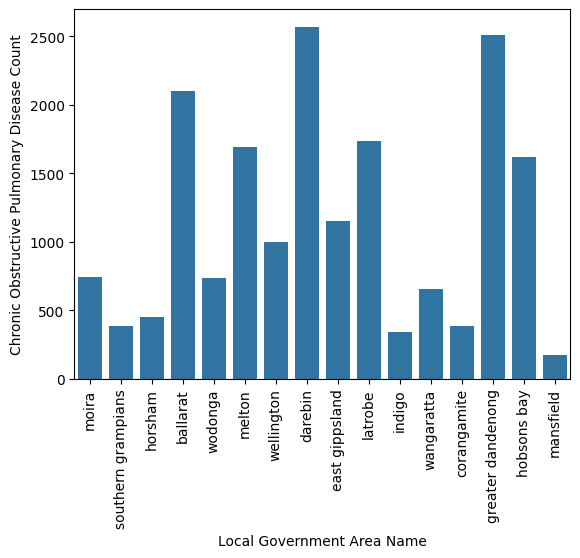

In [51]:
sns.barplot(x='Local Government Area Name', y='Chronic Obstructive Pulmonary Disease Count', data=df)
plt.xticks(rotation=90)
plt.show()

In [52]:
def expand_parameters(row):
    records = []
    for param, readings_list in row['parsed_parameters']:
        for reading in readings_list:
            time_series_name = reading['timeSeriesName']
            for reading_detail in reading['readings']:
                record = {
                    'Local Government Area Code': row['Local Government Area Code'],
                    'Local Government Area Name': row['Local Government Area Name'],
                    'Site Name': row['Site Name'],
                    'Time': row['Time'],
                    'Parameter Name': param,
                    'TimeSeries Name': time_series_name,
                    'Since': reading_detail.get('since', 'Unknown Time'),
                    'Until': reading_detail.get('until', 'Unknown Time'),
                    'Average Value': reading_detail.get('averageValue', 0),  # 默认值为0
                    'Unit': reading_detail.get('unit', 'Unknown Unit'),
                    'Confidence': reading_detail.get('confidence', 'Unknown Confidence'),
                    'Total Sample': reading_detail.get('totalSample', 'Unknown Sample'),
                    'Health Advice': reading_detail.get('healthAdvice', 'No Advice'),
                    'Health Advice Color': reading_detail.get('healthAdviceColor', 'No Color'),
                    'Health Code': reading_detail.get('healthCode', 'No Code')
                }
                records.append(record)
    return pd.DataFrame(records)


In [53]:
expanded_dataframes = df.apply(expand_parameters, axis=1)
expanded_df = pd.concat(expanded_dataframes.tolist(), ignore_index=True)
expanded_df.head(2)

,Local Government Area Code,Local Government Area Name,Site Name,Time,Parameter Name,TimeSeries Name,Since,Until,Average Value,Unit,Confidence,Total Sample,Health Advice,Health Advice Color,Health Code
0,24900,moira,Yarrawonga,2024-05-17T03:00:00Z,Particles,1HR_AV,2024-05-17T03:00:00Z,2024-05-17T04:00:00Z,0.00,Unknown Unit,0,0,No Advice,No Color,No Code
1,24900,moira,Yarrawonga,2024-05-17T03:00:00Z,Particles,24HR_AV,2024-05-16T04:00:00Z,2024-05-17T04:00:00Z,9.85,&micro;g/m&sup3;,95,276,Fair,#EEC900,9999


In [54]:
print(df.columns)

Index(['Local Government Area Code', 'Local Government Area Name',
       'Chronic Obstructive Pulmonary Disease RRMSE',
       'Persons with Mental and Behavioural Problems Rate per 100',
       'Asthma RRMSE',
       'Males with Mental and Behavioural Problems Rate per 100',
       'Chronic Obstructive Pulmonary Disease Count', 'Hypertension Count',
       'Hypertension RRMSE', 'Respiratory System Diseases Count',
       'Males with Mental and Behavioural Problems Count',
       'High Cholesterol Rate per 100', 'Asthma Rate per 100',
       'Diabetes Rate per 100', 'Musculoskeletal System Diseases RRMSE',
       'Females with Mental and Behavioural Problems RRMSE', 'Arthritis Count',
       'Respiratory System Diseases Rate per 100', 'Arthritis Rate per 100',
       'Hypertension Rate per 100', 'Circulatory System Diseases Rate per 100',
       'Females with Mental and Behavioural Problems Count', 'Diabetes RRMSE',
       'High Cholesterol Count', 'Circulatory System Diseases RRMSE',

In [55]:
print(expanded_df.columns)

Index(['Local Government Area Code', 'Local Government Area Name', 'Site Name',
       'Time', 'Parameter Name', 'TimeSeries Name', 'Since', 'Until',
       'Average Value', 'Unit', 'Confidence', 'Total Sample', 'Health Advice',
       'Health Advice Color', 'Health Code'],
      dtype='object')


In [56]:
expanded_df['Particles'] = pd.to_numeric(expanded_df['Average Value'].where(expanded_df['Parameter Name'] == 'Particles'), errors='coerce')
expanded_df['PM2_5'] = pd.to_numeric(expanded_df['Average Value'].where(expanded_df['Parameter Name'] == 'PM2.5'), errors='coerce')
expanded_df['PM10'] = pd.to_numeric(expanded_df['Average Value'].where(expanded_df['Parameter Name'] == 'PM10'), errors='coerce')

air_quality_summary = expanded_df.groupby(['Local Government Area Name', 'Time']).agg({'Particles': 'mean', 'PM2_5': 'mean', 'PM10': 'mean'}).reset_index()

df = pd.merge(df, air_quality_summary, on=['Local Government Area Name', 'Time'], how='left')
df.head(2)

,Local Government Area Code,Local Government Area Name,Chronic Obstructive Pulmonary Disease RRMSE,Persons with Mental and Behavioural Problems Rate per 100,Asthma RRMSE,Males with Mental and Behavioural Problems Rate per 100,Chronic Obstructive Pulmonary Disease Count,Hypertension Count,Hypertension RRMSE,Respiratory System Diseases Count,...,Parameters,Time,Local Government Area Shape.type,Local Government Area Shape.coordinates,relation_type.name,relation_type.parent,parsed_parameters,Particles,PM2_5,PM10
0,24900,moira,3,14.124853,3,11.989043,746.928469,3532.220757,3,8520.394817,...,"[{'name': 'Particles', 'timeSeriesReadings': [...",2024-05-17T03:00:00Z,Polygon,"[[[146.21053866500006, -36.11527584499994], [1...",epa,7,"[(Particles, [{'timeSeriesName': '1HR_AV', 're...",4.925,NaN,NaN
1,26260,southern grampians,1,13.209631,3,11.293796,384.044127,1960.486051,3,5110.028063,...,"[{'name': 'Particles', 'timeSeriesReadings': [...",2024-05-17T03:00:00Z,Polygon,"[[[142.36825914100007, -37.537848841999974], [...",epa,13,"[(Particles, [{'timeSeriesName': '1HR_AV', 're...",5.770,NaN,NaN


In [57]:
correlation_matrix = df[['Asthma Rate per 100', 'Chronic Obstructive Pulmonary Disease Rate per 100', 'PM2_5', 'PM10']].corr()
print(correlation_matrix)

                                                    Asthma Rate per 100  \
Asthma Rate per 100                                            1.000000   
Chronic Obstructive Pulmonary Disease Rate per 100             0.889073   
PM2_5                                                          0.439663   
PM10                                                          -0.723852   

                                                    Chronic Obstructive Pulmonary Disease Rate per 100  \
Asthma Rate per 100                                                                          0.889073    
Chronic Obstructive Pulmonary Disease Rate per 100                                           1.000000    
PM2_5                                                                                        0.442669    
PM10                                                                                        -0.811351    

                                                       PM2_5      PM10  
Asthma Rate per 100 

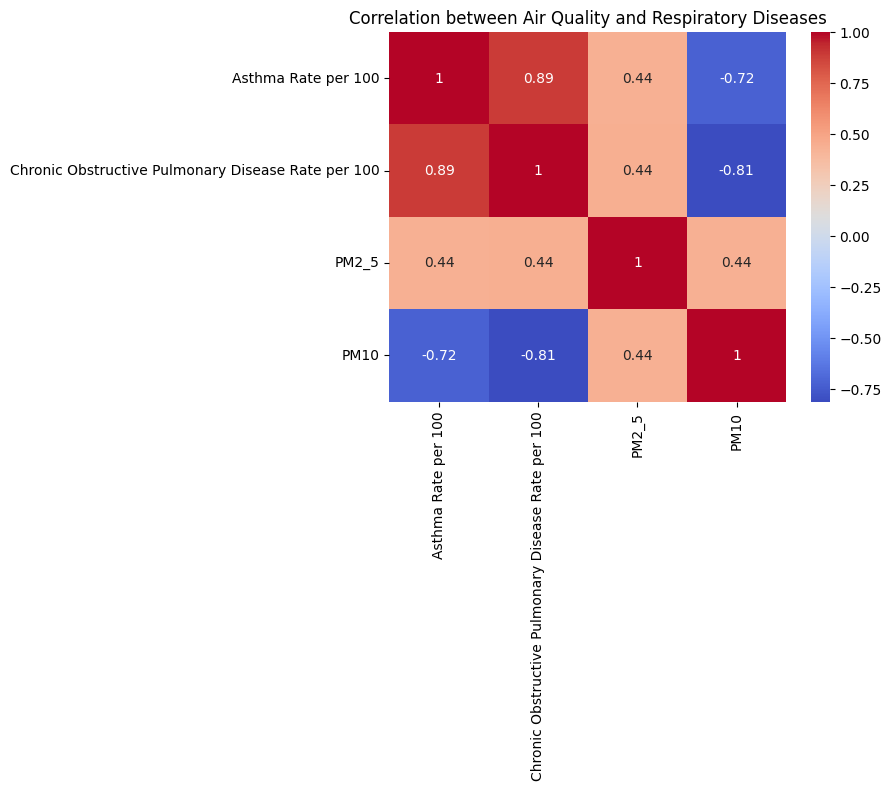

In [58]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Air Quality and Respiratory Diseases')
plt.show()

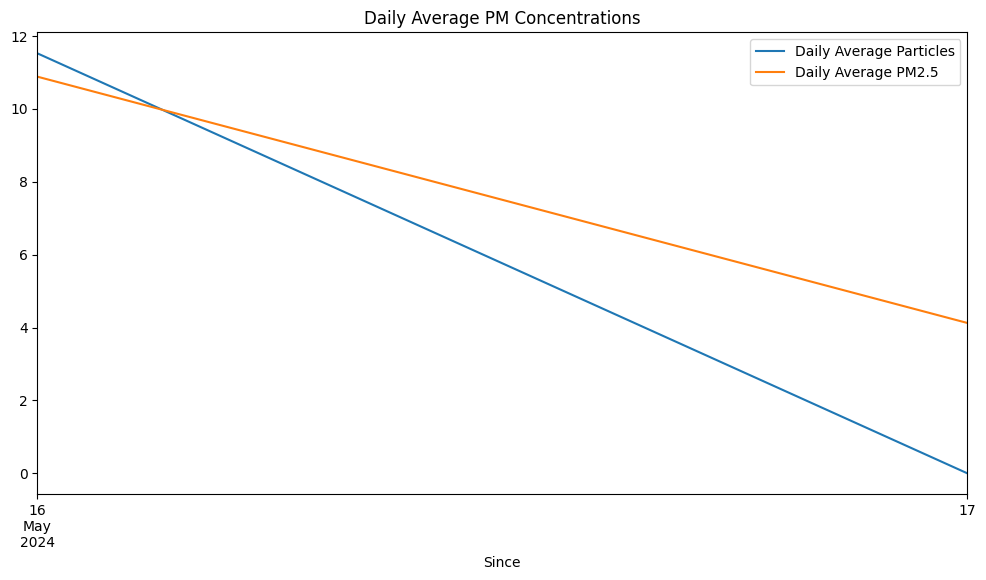

In [59]:
expanded_df['Since'] = pd.to_datetime(expanded_df['Since'])

expanded_df.set_index('Since', inplace=True)

daily_pm10 = expanded_df['Particles'].resample('D').mean()
daily_pm25 = expanded_df['PM2_5'].resample('D').mean()

plt.figure(figsize=(12, 6))
daily_pm10.plot(label='Daily Average Particles')
daily_pm25.plot(label='Daily Average PM2.5')
plt.title('Daily Average PM Concentrations')
plt.legend()
plt.show()


In [60]:
expanded_df.head(1)

,Local Government Area Code,Local Government Area Name,Site Name,Time,Parameter Name,TimeSeries Name,Until,Average Value,Unit,Confidence,Total Sample,Health Advice,Health Advice Color,Health Code,Particles,PM2_5,PM10
Since,,,,,,,,,,,,,,,,,
2024-05-17 03:00:00+00:00,24900,moira,Yarrawonga,2024-05-17T03:00:00Z,Particles,1HR_AV,2024-05-17T04:00:00Z,0.0,Unknown Unit,0,0,No Advice,No Color,No Code,0.0,NaN,NaN


In [61]:
def extract_polygon_center(coordinates):
    if coordinates:
        all_coords = np.array(coordinates[0])
        center = all_coords.mean(axis=0)
        return center
    return [np.nan, np.nan]

df['Center Coordinates'] = df['Local Government Area Shape.coordinates'].apply(extract_polygon_center)

In [62]:
combined_df = pd.merge(expanded_df, df[['Local Government Area Name', 'Center Coordinates']], on='Local Government Area Name', how='left')

combined_df['Time'] = pd.to_datetime(combined_df['Time'])
combined_df.set_index('Time', inplace=True)

In [63]:
combined_df.head(1)

,Local Government Area Code,Local Government Area Name,Site Name,Parameter Name,TimeSeries Name,Until,Average Value,Unit,Confidence,Total Sample,Health Advice,Health Advice Color,Health Code,Particles,PM2_5,PM10,Center Coordinates
Time,,,,,,,,,,,,,,,,,
2024-05-17 03:00:00+00:00,24900,moira,Yarrawonga,Particles,1HR_AV,2024-05-17T04:00:00Z,0.0,Unknown Unit,0,0,No Advice,No Color,No Code,0.0,NaN,NaN,"[145.46943744980516, -35.930065048941756]"


/var/folders/zs/mycxx39x0gj9x65vxxb5ztd00000gn/T/ipykernel_77511/3604279850.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_pm25 = combined_df[combined_df['Parameter Name'] == 'PM2.5']['Average Value'].resample('H').mean()
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


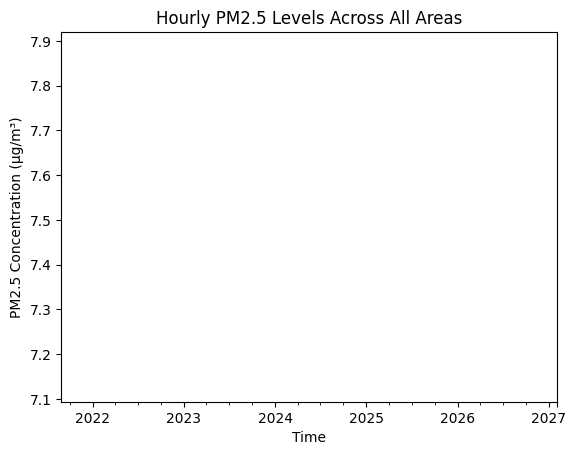

In [64]:
hourly_pm25 = combined_df[combined_df['Parameter Name'] == 'PM2.5']['Average Value'].resample('H').mean()
hourly_pm25.plot(title='Hourly PM2.5 Levels Across All Areas')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.show()

In [65]:
m = folium.Map(location=[-37, 145], zoom_start=7)

for idx, row in combined_df.iterrows():
    if not np.isnan(row['Center Coordinates']).any():
        folium.CircleMarker(location=row['Center Coordinates'][::-1],
                            radius=5,
                            fill=True,
                            color='#3186cc',
                            fill_color='#3186cc',
                            popup=f'PM2.5: {row["Average Value"]}',
                            ).add_to(m)

m

In [66]:
m1 = folium.Map(location=[-37, 145], zoom_start=7)

for idx, row in combined_df.iterrows():
    if not np.isnan(row['Center Coordinates']).any():
        folium.Circle(
            location=[row['Center Coordinates'][1], row['Center Coordinates'][0]],
            radius=row['Average Value']*100,
            color='blue' if 'PM2.5' in row['Parameter Name'] else 'green',
            fill=True,
            popup=f"{row['Parameter Name']} concentration: {row['Average Value']}"
        ).add_to(m)

m1